In [67]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import catboost as cb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit,StratifiedKFold,TimeSeriesSplit,KFold,GroupKFold,train_test_split,GroupShuffleSplit,StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score,mean_squared_error,mean_absolute_error,log_loss,confusion_matrix,accuracy_score,cohen_kappa_score
import xgboost as xgb
import datetime
from sklearn.linear_model import LogisticRegression
from scipy.stats import pearsonr
import gc
from sklearn.model_selection import TimeSeriesSplit
#from bayes_opt import BayesianOptimization
import re
from string import punctuation
from scipy.spatial import Voronoi
from scipy.spatial import ConvexHull
from scipy.spatial import Delaunay
from tqdm.notebook import tqdm
#from numba import jit
from collections import Counter
import json
import joblib
import multiprocessing
import time
# import keras
from sklearn.preprocessing import StandardScaler,OneHotEncoder
# from gensim.models import Word2Vec
# from keras.preprocessing.text import Tokenizer, text_to_word_sequence
# from keras.preprocessing.sequence import pad_sequences
# import keras.backend as K
# from keras import models
# from keras import layers
# from keras.layers import *
# from keras.models import *
# from keras.callbacks import *
# import math 
# import logging
# from scipy.sparse import csr_matrix,hstack
# import scipy
# pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 25)

# pd.set_option('max_columns', None)
# pd.set_option('max_rows', 300)
# pd.set_option('max_colwidth', 200)

In [68]:
import optuna

In [69]:
cust_avli_q3 = pd.read_csv('../raw_data/x_train/cust_avli_Q3.csv')
cust_avli_q4 = pd.read_csv('../raw_data/x_train/cust_avli_Q4.csv')
cust_info_q3 = pd.read_csv('../raw_data/x_train/cust_info_q3.csv')
cust_info_q4 = pd.read_csv('../raw_data/x_train/cust_info_q4.csv')

cust_avli_q1 = pd.read_csv('../raw_data/x_test/cust_avli_Q1.csv')
cust_info_q1 = pd.read_csv('../raw_data/x_test/cust_info_q1.csv')

In [70]:
y_train_q3 = pd.read_csv('../raw_data/y_train_3/y_Q3_3.csv')
y_train_q4 = pd.read_csv('../raw_data/y_train_3/y_Q4_3.csv')

 -  cust_avli _Q(Z) 代表第 Z 季度的有效客户 仅有 cust_no 好像没啥用

In [71]:
print('q3',cust_avli_q3.shape)
print('q4',cust_avli_q4.shape)
print('q1',cust_avli_q1.shape)

q3 (69126, 1)
q4 (76170, 1)
q1 (76722, 1)


In [72]:
cust_info_q3 = cust_info_q3.merge(cust_avli_q3,how='inner',on='cust_no')
print(cust_info_q3.shape)
cust_info_q4 = cust_info_q4.merge(cust_avli_q4,how='inner',on='cust_no')
print(cust_info_q4.shape)
cust_info_q1 = cust_info_q1.merge(cust_avli_q1,how='inner',on='cust_no')
print(cust_info_q1.shape)

(69126, 21)
(76170, 21)
(76722, 21)


In [73]:
big_event_Q3 = pd.read_csv('../raw_data/x_train/big_event_train/big_event_Q3.csv')
big_event_Q4 = pd.read_csv('../raw_data/x_train/big_event_train/big_event_Q4.csv')
big_event_Q1 = pd.read_csv('../raw_data/x_test/big_event_test/big_event_Q1.csv')

E:\software\ANACONDA3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning:

Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.



In [74]:
big_event_Q3 = big_event_Q3.merge(cust_avli_q3,how='inner',on='cust_no')
print(big_event_Q3.shape)
big_event_Q4 = big_event_Q4.merge(cust_avli_q4,how='inner',on='cust_no')
print(big_event_Q4.shape)
big_event_Q1 = big_event_Q1.merge(cust_avli_q1,how='inner',on='cust_no')
print(big_event_Q1.shape)

(69126, 19)
(76170, 19)
(76722, 19)


In [75]:
cust_info_q3 = cust_info_q3.merge(cust_avli_q3,how='inner',on='cust_no')
print(cust_info_q3.shape)
cust_info_q4 = cust_info_q4.merge(cust_avli_q4,how='inner',on='cust_no')
print(cust_info_q4.shape)
cust_info_q1 = cust_info_q1.merge(cust_avli_q1,how='inner',on='cust_no')
print(cust_info_q1.shape)

(69126, 21)
(76170, 21)
(76722, 21)


In [76]:
aum_m7 = pd.read_csv('../raw_data/x_train/aum_train/aum_m7.csv') 
aum_m8 = pd.read_csv('../raw_data/x_train/aum_train/aum_m8.csv')
aum_m9 = pd.read_csv('../raw_data/x_train/aum_train/aum_m9.csv')
aum_m10 = pd.read_csv('../raw_data/x_train/aum_train/aum_m10.csv')
aum_m11 = pd.read_csv('../raw_data/x_train/aum_train/aum_m11.csv')
aum_m12 = pd.read_csv('../raw_data/x_train/aum_train/aum_m12.csv')
aum_m1 = pd.read_csv('../raw_data/x_test/aum_test/aum_m1.csv')
aum_m2 = pd.read_csv('../raw_data/x_test/aum_test/aum_m2.csv')
aum_m3 =pd.read_csv('../raw_data/x_test/aum_test/aum_m3.csv')

In [77]:
print('all avli q3',cust_avli_q3.shape[0])
aum_m7 = aum_m7.merge(cust_avli_q3,how='inner',on = 'cust_no')
print('m7',aum_m7.shape[0])
aum_m8 = aum_m8.merge(cust_avli_q3,how='inner',on = 'cust_no')
print('m8',aum_m8.shape[0])
aum_m9 = aum_m9.merge(cust_avli_q3,how='inner',on = 'cust_no')
print('m9',aum_m9.shape[0])
print('all avli q4',cust_avli_q4.shape[0])
aum_m10 = aum_m10.merge(cust_avli_q4,how='inner',on = 'cust_no')
print('m10',aum_m10.shape[0])
aum_m11 = aum_m11.merge(cust_avli_q4,how='inner',on = 'cust_no')
print('m11',aum_m11.shape[0])
aum_m12 = aum_m12.merge(cust_avli_q4,how='inner',on = 'cust_no')
print('m12',aum_m12.shape[0])
print('all avli q1',cust_avli_q1.shape[0])
aum_m1 = aum_m1.merge(cust_avli_q1,how='inner',on = 'cust_no')
print('m1',aum_m1.shape[0])
aum_m2 = aum_m2.merge(cust_avli_q1,how='inner',on = 'cust_no')
print('m2',aum_m2.shape[0])
aum_m3 = aum_m3.merge(cust_avli_q1,how='inner',on = 'cust_no')
print('m3',aum_m3.shape[0])

all avli q3 69126
m7 65135
m8 67276
m9 69126
all avli q4 76170
m10 71496
m11 73931
m12 76170
all avli q1 76722
m1 76722
m2 76722
m3 76722


In [78]:
behavior_m7 = pd.read_csv('../raw_data/x_train/behavior_train/behavior_m7.csv') 
behavior_m8 = pd.read_csv('../raw_data/x_train/behavior_train/behavior_m8.csv')
behavior_m9 = pd.read_csv('../raw_data/x_train/behavior_train/behavior_m9.csv')
behavior_m10 = pd.read_csv('../raw_data/x_train/behavior_train/behavior_m10.csv')
behavior_m11 = pd.read_csv('../raw_data/x_train/behavior_train/behavior_m11.csv')
behavior_m12 = pd.read_csv('../raw_data/x_train/behavior_train/behavior_m12.csv')
behavior_m1 = pd.read_csv('../raw_data/x_test/behavior_test/behavior_m1.csv')
behavior_m2 = pd.read_csv('../raw_data/x_test/behavior_test/behavior_m2.csv')
behavior_m3 =pd.read_csv('../raw_data/x_test/behavior_test/behavior_m3.csv')

In [79]:
print('all avli q3',cust_avli_q3.shape[0])
behavior_m7 = behavior_m7.merge(cust_avli_q3,how='inner',on = 'cust_no')
print('m7',behavior_m7.shape[0])
behavior_m8 = behavior_m8.merge(cust_avli_q3,how='inner',on = 'cust_no')
print('m8',behavior_m8.shape[0])
behavior_m9 = behavior_m9.merge(cust_avli_q3,how='inner',on = 'cust_no')
print('m9',behavior_m9.shape[0])
print('all avli q4',cust_avli_q4.shape[0])
behavior_m10 = behavior_m10.merge(cust_avli_q4,how='inner',on = 'cust_no')
print('m10',behavior_m10.shape[0])
behavior_m11 = behavior_m11.merge(cust_avli_q4,how='inner',on = 'cust_no')
print('m11',behavior_m11.shape[0])
behavior_m12 = behavior_m12.merge(cust_avli_q4,how='inner',on = 'cust_no')
print('m12',behavior_m12.shape[0])
print('all avli q1',cust_avli_q1.shape[0])
behavior_m1 = behavior_m1.merge(cust_avli_q1,how='inner',on = 'cust_no')
print('m1',behavior_m1.shape[0])
behavior_m2 = behavior_m2.merge(cust_avli_q1,how='inner',on = 'cust_no')
print('m2',behavior_m2.shape[0])
behavior_m3 = behavior_m3.merge(cust_avli_q1,how='inner',on = 'cust_no')
print('m3',behavior_m3.shape[0])

all avli q3 69126
m7 65135
m8 67276
m9 69126
all avli q4 76170
m10 71496
m11 73931
m12 76170
all avli q1 76722
m1 76722
m2 76722
m3 76722


In [80]:
behavior_m3['B6'] = pd.to_datetime(behavior_m3['B6'])
behavior_m9['B6'] = pd.to_datetime(behavior_m9['B6'])
behavior_m12['B6'] = pd.to_datetime(behavior_m12['B6'])

In [81]:
behavior_m3['diff_last_trans'] = (pd.to_datetime('2020-04-01 00:00:00') - behavior_m3['B6']).dt.days
behavior_m9['diff_last_trans'] = (pd.to_datetime('2019-10-01 00:00:00') - behavior_m9['B6']).dt.days
behavior_m12['diff_last_trans'] = (pd.to_datetime('2020-01-01 00:00:00') - behavior_m12['B6']).dt.days

In [82]:
behavior_m3['diff_last_trans'].describe()

count    63293.000000
mean        20.836017
std         24.058841
min          0.000000
25%          3.000000
50%         11.000000
75%         28.000000
max         90.000000
Name: diff_last_trans, dtype: float64

In [83]:
behavior_m9['diff_last_trans'].describe()

count    64179.000000
mean        30.827264
std         44.650686
min          0.000000
25%          3.000000
50%         11.000000
75%         39.000000
max        219.000000
Name: diff_last_trans, dtype: float64

In [84]:
behavior_m12['diff_last_trans'].describe()

count    72239.000000
mean        36.911710
std         55.853151
min          0.000000
25%          3.000000
50%         13.000000
75%         47.000000
max        311.000000
Name: diff_last_trans, dtype: float64

In [85]:
behavior_m3.B6.agg(['max','min'])

max   2020-03-31 23:59:00
min   2020-01-01 00:11:00
Name: B6, dtype: datetime64[ns]

In [86]:
behavior_m9.B6.agg(['max','min'])

max   2019-09-30 23:59:00
min   2019-02-23 02:31:00
Name: B6, dtype: datetime64[ns]

In [87]:
behavior_m12.B6.agg(['max','min'])

max   2019-12-31 23:34:00
min   2019-02-23 02:31:00
Name: B6, dtype: datetime64[ns]

In [88]:
behavior_m3.B6.dt.month.value_counts(dropna=False)

3.0    48817
NaN    13429
1.0     7849
2.0     6627
Name: B6, dtype: int64

In [89]:
behavior_m9.B6.dt.month.value_counts(dropna=False)

9.0    45325
8.0     7136
7.0     5024
NaN     4947
6.0     2498
5.0     1961
4.0     1099
3.0     1002
2.0      134
Name: B6, dtype: int64

In [90]:
behavior_m12.B6.dt.month.value_counts(dropna=False)

12.0    49747
11.0     7879
10.0     5352
NaN      3931
9.0      3013
8.0      1624
7.0      1494
6.0      1130
5.0      1107
4.0       579
3.0       268
2.0        46
Name: B6, dtype: int64

In [91]:
for df in [behavior_m1,behavior_m2,behavior_m3,behavior_m7,behavior_m8,behavior_m9,behavior_m10,behavior_m11,behavior_m12]:
    ###平均转入金额
    df['B3-div-B2'] = df['B3']/df['B2']
    ### 平均转出金额
    df['B5-div-B4'] = df['B5']/df['B4']
    ### 转入/转出次数的差/商
    df['B3-div-B5'] = df['B3']/df['B5']
    df['B3-diff-B5'] = df['B3'] - df['B5']
    ### 转入/转出金额的差/商
    df['B2-div-B4'] = df['B2']/df['B4']
    df['B2-diff-B4'] = df['B2'] - df['B4']

In [92]:
####为了简便
for table in [behavior_m3,behavior_m9,behavior_m12]:
    table.drop(['B6'],axis=1,inplace=True)

In [93]:
cunkuan_m7 = pd.read_csv('../raw_data/x_train/cunkuan_train/cunkuan_m7.csv') 
cunkuan_m8 = pd.read_csv('../raw_data/x_train/cunkuan_train/cunkuan_m8.csv')
cunkuan_m9 = pd.read_csv('../raw_data/x_train/cunkuan_train/cunkuan_m9.csv')
cunkuan_m10 = pd.read_csv('../raw_data/x_train/cunkuan_train/cunkuan_m10.csv')
cunkuan_m11 = pd.read_csv('../raw_data/x_train/cunkuan_train/cunkuan_m11.csv')
cunkuan_m12 = pd.read_csv('../raw_data/x_train/cunkuan_train/cunkuan_m12.csv')
cunkuan_m1 = pd.read_csv('../raw_data/x_test/cunkuan_test/cunkuan_m1.csv')
cunkuan_m2 = pd.read_csv('../raw_data/x_test/cunkuan_test/cunkuan_m2.csv')
cunkuan_m3 =pd.read_csv('../raw_data/x_test/cunkuan_test/cunkuan_m3.csv')

In [94]:
print('all avli q3',cust_avli_q3.shape[0])
cunkuan_m7 = cunkuan_m7.merge(cust_avli_q3,how='inner',on = 'cust_no')
print('m7',cunkuan_m7.shape[0])
cunkuan_m8 = cunkuan_m8.merge(cust_avli_q3,how='inner',on = 'cust_no')
print('m8',cunkuan_m8.shape[0])
cunkuan_m9 = cunkuan_m9.merge(cust_avli_q3,how='inner',on = 'cust_no')
print('m9',cunkuan_m9.shape[0])
print('all avli q4',cust_avli_q4.shape[0])
cunkuan_m10 = cunkuan_m10.merge(cust_avli_q4,how='inner',on = 'cust_no')
print('m10',cunkuan_m10.shape[0])
cunkuan_m11 = cunkuan_m11.merge(cust_avli_q4,how='inner',on = 'cust_no')
print('m11',cunkuan_m11.shape[0])
cunkuan_m12 = cunkuan_m12.merge(cust_avli_q4,how='inner',on = 'cust_no')
print('m12',cunkuan_m12.shape[0])
print('all avli q1',cust_avli_q1.shape[0])
cunkuan_m1 = cunkuan_m1.merge(cust_avli_q1,how='inner',on = 'cust_no')
print('m1',cunkuan_m1.shape[0])
cunkuan_m2 = cunkuan_m2.merge(cust_avli_q1,how='inner',on = 'cust_no')
print('m2',cunkuan_m2.shape[0])
cunkuan_m3 = cunkuan_m3.merge(cust_avli_q1,how='inner',on = 'cust_no')
print('m3',cunkuan_m3.shape[0])

all avli q3 69126
m7 64173
m8 66711
m9 69122
all avli q4 76170
m10 70364
m11 73345
m12 76167
all avli q1 76722
m1 76719
m2 76719
m3 76719


In [95]:
train_q3 = y_train_q3.copy()
train_q3['quarter'] = 3
train_q4 = y_train_q4.copy()
train_q4['quarter'] = 4
test_q1 = cust_avli_q1.copy()
test_q1['quarter'] = 1

In [96]:
train_q3 = train_q3.merge(aum_m7.set_index('cust_no').add_prefix('num1_').reset_index(),on='cust_no',how='left')
train_q3 = train_q3.merge(aum_m8.set_index('cust_no').add_prefix('num2_').reset_index(),on='cust_no',how='left')
train_q3 = train_q3.merge(aum_m9.set_index('cust_no').add_prefix('num3_').reset_index(),on='cust_no',how='left')

train_q4 = train_q4.merge(aum_m10.set_index('cust_no').add_prefix('num1_').reset_index(),on='cust_no',how='left')
train_q4 = train_q4.merge(aum_m11.set_index('cust_no').add_prefix('num2_').reset_index(),on='cust_no',how='left')
train_q4 = train_q4.merge(aum_m12.set_index('cust_no').add_prefix('num3_').reset_index(),on='cust_no',how='left')


test_q1 = test_q1.merge(aum_m1.set_index('cust_no').add_prefix('num1_').reset_index(),on='cust_no',how='left')
test_q1 = test_q1.merge(aum_m2.set_index('cust_no').add_prefix('num2_').reset_index(),on='cust_no',how='left')
test_q1 = test_q1.merge(aum_m3.set_index('cust_no').add_prefix('num3_').reset_index(),on='cust_no',how='left')

In [97]:
train_q3 = train_q3.merge(behavior_m7.set_index('cust_no').add_prefix('num1_').reset_index(),on='cust_no',how='left')
train_q3 = train_q3.merge(behavior_m8.set_index('cust_no').add_prefix('num2_').reset_index(),on='cust_no',how='left')
train_q3 = train_q3.merge(behavior_m9.set_index('cust_no').add_prefix('num3_').reset_index(),on='cust_no',how='left')

train_q4 = train_q4.merge(behavior_m10.set_index('cust_no').add_prefix('num1_').reset_index(),on='cust_no',how='left')
train_q4 = train_q4.merge(behavior_m11.set_index('cust_no').add_prefix('num2_').reset_index(),on='cust_no',how='left')
train_q4 = train_q4.merge(behavior_m12.set_index('cust_no').add_prefix('num3_').reset_index(),on='cust_no',how='left')


test_q1 = test_q1.merge(behavior_m1.set_index('cust_no').add_prefix('num1_').reset_index(),on='cust_no',how='left')
test_q1 = test_q1.merge(behavior_m2.set_index('cust_no').add_prefix('num2_').reset_index(),on='cust_no',how='left')
test_q1 = test_q1.merge(behavior_m3.set_index('cust_no').add_prefix('num3_').reset_index(),on='cust_no',how='left')

In [98]:
train_q3 = train_q3.merge(cunkuan_m7.set_index('cust_no').add_prefix('num1_').reset_index(),on='cust_no',how='left')
train_q3 = train_q3.merge(cunkuan_m8.set_index('cust_no').add_prefix('num2_').reset_index(),on='cust_no',how='left')
train_q3 = train_q3.merge(cunkuan_m9.set_index('cust_no').add_prefix('num3_').reset_index(),on='cust_no',how='left')

train_q4 = train_q4.merge(cunkuan_m10.set_index('cust_no').add_prefix('num1_').reset_index(),on='cust_no',how='left')
train_q4 = train_q4.merge(cunkuan_m11.set_index('cust_no').add_prefix('num2_').reset_index(),on='cust_no',how='left')
train_q4 = train_q4.merge(cunkuan_m12.set_index('cust_no').add_prefix('num3_').reset_index(),on='cust_no',how='left')


test_q1 = test_q1.merge(cunkuan_m1.set_index('cust_no').add_prefix('num1_').reset_index(),on='cust_no',how='left')
test_q1 = test_q1.merge(cunkuan_m2.set_index('cust_no').add_prefix('num2_').reset_index(),on='cust_no',how='left')
test_q1 = test_q1.merge(cunkuan_m3.set_index('cust_no').add_prefix('num3_').reset_index(),on='cust_no',how='left')

In [99]:
train_q3 = train_q3.merge(cust_info_q3,on='cust_no',how='left')
train_q4 = train_q4.merge(cust_info_q4,on='cust_no',how='left')
test_q1 = test_q1.merge(cust_info_q1,on='cust_no',how='left')

In [100]:
train = train_q3.append(train_q4,ignore_index=True)

In [101]:
#### 每个月存入总金额的和/三个月平均
cunru_list = [f'X{_}' for _ in range(1,9) if _ !=7]
for prefix in ['num1','num2','num3']:
    col_lists = [prefix+'_'+_ for _ in cunru_list]
    train[f'{prefix}_cunru_sum'] = train[col_lists].sum(axis=1)
    test_q1[f'{prefix}_cunru_sum'] = test_q1[col_lists].sum(axis=1)

In [102]:
train['cunru_month_avg'] = train[['num1_cunru_sum','num2_cunru_sum','num3_cunru_sum']].mean(axis=1)
test_q1['cunru_month_avg'] = test_q1[['num1_cunru_sum','num2_cunru_sum','num3_cunru_sum']].mean(axis=1)

In [103]:
train['cunru_month_std'] = train[['num1_cunru_sum','num2_cunru_sum','num3_cunru_sum']].std(axis=1)
test_q1['cunru_month_std'] = test_q1[['num1_cunru_sum','num2_cunru_sum','num3_cunru_sum']].std(axis=1)

train['cunru_month_max'] = train[['num1_cunru_sum','num2_cunru_sum','num3_cunru_sum']].max(axis=1)
test_q1['cunru_month_max'] = test_q1[['num1_cunru_sum','num2_cunru_sum','num3_cunru_sum']].max(axis=1)

train['cunru_month_min'] = train[['num1_cunru_sum','num2_cunru_sum','num3_cunru_sum']].min(axis=1)
test_q1['cunru_month_min'] = test_q1[['num1_cunru_sum','num2_cunru_sum','num3_cunru_sum']].min(axis=1)

train['cunru_month_cv'] = train['cunru_month_std']/train['cunru_month_avg']
test_q1['cunru_month_cv'] = test_q1['cunru_month_std']/train['cunru_month_avg']

In [104]:
#### 3和2的差 3和1的差 2和1的差
for i in [1,2,3]:
    for j in [1,2,3]:
        if i>j:
            train[f'diff_cunru_sum_{i}_{j}'] = train[f'num{i}_cunru_sum'] - train[f'num{j}_cunru_sum']
            train[f'ratio_cunru_sum_{i}_{j}'] = train[f'num{i}_cunru_sum'] / train[f'num{j}_cunru_sum']
            test_q1[f'diff_cunru_sum_{i}_{j}'] = test_q1[f'num{i}_cunru_sum'] - test_q1[f'num{j}_cunru_sum']
            test_q1[f'ratio_cunru_sum_{i}_{j}'] = test_q1[f'num{i}_cunru_sum'] / test_q1[f'num{j}_cunru_sum']
#####最后一个月和前3个月的均值
train['ratio_num3_cunru_sum_mean'] = train['num3_cunru_sum']/train['cunru_month_avg']
test_q1['ratio_num3_cunru_sum_mean'] = test_q1['num3_cunru_sum']/test_q1['cunru_month_avg']

#####最后一个月和前3个月的差值
train['diff_num3_cunru_sum_mean'] = train['num3_cunru_sum'] - train['cunru_month_avg']
test_q1['diff_num3_cunru_sum_mean'] = test_q1['num3_cunru_sum'] - test_q1['cunru_month_avg']

In [105]:
#### 每个月贷款占总存款的比例
for prefix in ['num1','num2','num3']:
    train[prefix+'_ratio_daikuan_cunkuan'] = train[prefix+'_X7']/train[prefix+'_cunru_sum']
    test_q1[prefix+'_ratio_daikuan_cunkuan'] = test_q1[prefix+'_X7']/test_q1[prefix+'_cunru_sum']
    train[prefix+'_diff_daikuan_cunkuan'] = train[prefix+'_cunru_sum'] - train[prefix+'_X7'] 
    test_q1[prefix+'_diff_daikuan_cunkuan'] = test_q1[prefix+'_cunru_sum'] - test_q1[prefix+'_X7']
#### 贷款比例的平均
train['avg_daikuan_sum_ratio'] = train[['num1_ratio_daikuan_cunkuan','num2_ratio_daikuan_cunkuan','num3_ratio_daikuan_cunkuan']].mean(axis=1)
test_q1['avg_daikuan_sum_ratio'] = test_q1[['num1_ratio_daikuan_cunkuan','num2_ratio_daikuan_cunkuan','num3_ratio_daikuan_cunkuan']].mean(axis=1)
### 存款 - 贷款的平均
train['avg_daikuan_sum_diff'] = train[['num1_diff_daikuan_cunkuan','num2_diff_daikuan_cunkuan','num3_diff_daikuan_cunkuan']].mean(axis=1)
test_q1['avg_daikuan_sum_diff'] = test_q1[['num1_diff_daikuan_cunkuan','num2_diff_daikuan_cunkuan','num3_diff_daikuan_cunkuan']].mean(axis=1)

In [106]:
#### 3个月贷款金额的平均
train['daikuan_month_avg'] = train[['num1_X7','num2_X7','num3_X7']].mean(axis=1)
test_q1['daikuan_month_avg'] = test_q1[['num1_X7','num2_X7','num3_X7']].mean(axis=1)
#### 3和2的差 3和1的差 2和1的差 贷款
for i in [1,2,3]:
    for j in [1,2,3]:
        if i>j:
            train[f'diff_daikuan_{i}_{j}'] = train[f'num{i}_X7'] - train[f'num{j}_X7']
            train[f'ratio_daikuan_{i}_{j}'] = train[f'num{i}_X7'] / train[f'num{j}_X7']
            test_q1[f'diff_daikuan_{i}_{j}'] = test_q1[f'num{i}_X7'] - test_q1[f'num{j}_X7']
            test_q1[f'ratio_daikuan_{i}_{j}'] = test_q1[f'num{i}_X7'] / test_q1[f'num{j}_X7']
#####最后一个月和前3个月的均值/差
train['ratio_num3_daikuan_mean'] = train['num3_X7']/train['daikuan_month_avg']
test_q1['ratio_num3_daikuan_mean'] = test_q1['num3_X7']/test_q1['daikuan_month_avg']

train['diff_num3_daikuan_mean'] = train['num3_X7']- train['daikuan_month_avg']
test_q1['diff_num3_daikuan_mean'] = test_q1['num3_X7']- test_q1['daikuan_month_avg']

In [107]:
#### 3个月贷款金额的最大/最小/std
train['daikuan_month_std'] = train[['num1_X7','num2_X7','num3_X7']].std(axis=1)
test_q1['daikuan_month_std'] = test_q1[['num1_X7','num2_X7','num3_X7']].std(axis=1)

train['daikuan_month_max'] = train[['num1_X7','num2_X7','num3_X7']].max(axis=1)
test_q1['daikuan_month_max'] = test_q1[['num1_X7','num2_X7','num3_X7']].max(axis=1)

train['daikuan_month_min'] = train[['num1_X7','num2_X7','num3_X7']].min(axis=1)
test_q1['daikuan_month_min'] = test_q1[['num1_X7','num2_X7','num3_X7']].min(axis=1)

train['daikuan_month_cv'] = train['daikuan_month_std']/train['daikuan_month_avg']
test_q1['daikuan_month_cv'] = test_q1['daikuan_month_std']/test_q1['daikuan_month_avg']

In [108]:
# ### 每个值的平均/各个月的差值/比例 3月份/比例
# cols = [f'X{_}' for _ in range(1,9) if _ !=7]
# dfs = [train,test_q1]
# for df in dfs:
#     for col in cols:
#         df[f'{col}_month_avg'] = df[[f'num1_{col}',f'num2_{col}',f'num3_{col}']].mean(axis=1)
#         df[f'ratio_num3_{col}_mean'] = df[f'num3_{col}']/df[f'{col}_month_avg']
#         df[f'diff_num3_{col}_mean'] = df[f'num3_{col}'] - df[f'{col}_month_avg']
        
#         for i in [1,2,3]:
#             for j in [1,2,3]:
#                 if i>j:
#                     df[f'diff_{col}_{i}_{j}'] = train[f'num{i}_{col}'] - train[f'num{j}_{col}']
#                     df[f'ratio_{col}_{i}_{j}'] = train[f'num{i}_{col}'] / train[f'num{j}_{col}']

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

(0, 150)

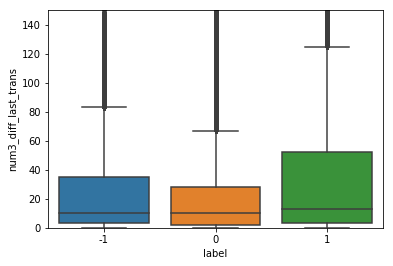

In [119]:
sns.boxplot(train.label,train.num3_diff_last_trans)
plt.ylim(0,150)

In [148]:
train.label[train.num3_diff_last_trans>=170].value_counts(normalize=True)

 1    0.777757
 0    0.148348
-1    0.073895
Name: label, dtype: float64

In [122]:
train.label.value_counts(normalize=True)

 1    0.638820
 0    0.208106
-1    0.153074
Name: label, dtype: float64

In [126]:
train.label[train.num3_diff_last_trans<=90].value_counts(normalize=True)

 1    0.602154
 0    0.224091
-1    0.173756
Name: label, dtype: float64

In [128]:
train.num3_diff_last_trans[train.num3_diff_last_trans<=90].value_counts()

0.0     21785
1.0      7721
3.0      5221
10.0     5198
4.0      5025
        ...  
65.0      105
72.0       96
79.0       80
86.0       68
85.0       67
Name: num3_diff_last_trans, Length: 91, dtype: int64

In [125]:
test_q1.num3_diff_last_trans.value_counts()

0.0     8420
1.0     4627
10.0    3421
4.0     3038
11.0    2071
        ... 
61.0      46
63.0      40
64.0      38
90.0      32
65.0      21
Name: num3_diff_last_trans, Length: 91, dtype: int64

In [114]:
train.num3_diff_last_trans

0         18.0
1         69.0
2         43.0
3          4.0
4         46.0
          ... 
145291    93.0
145292     0.0
145293     0.0
145294     0.0
145295    77.0
Name: num3_diff_last_trans, Length: 145296, dtype: float64

In [109]:
#### behavior
cols = [f'B{_}' for _ in range(1,5)]
df = [train,test_q1]
for prefix in ['num1','num2','num3']:
    col_lists = [prefix+'_'+_ for _ in cunru_list]
    train[f'{prefix}_cunru_sum'] = train[col_lists].sum(axis=1)
    test_q1[f'{prefix}_cunru_sum'] = test_q1[col_lists].sum(axis=1)

In [110]:
##### behavior系列 三个月的平均 最后一个月与平均的差/与比例
cols = [f'B{_}' for _ in range(1,5)]
dfs = [train,test_q1]
add_list 
for df in dfs:
    for col in cols:
        df[f'{col}_month_avg'] = df[[f'num1_{col}',f'num2_{col}',f'num3_{col}']].mean(axis=1)
        df[f'ratio_num3_{col}_mean'] = df[f'num3_{col}']/df[f'{col}_month_avg']
        df[f'diff_num3_{col}_mean'] = df[f'num3_{col}'] - df[f'{col}_month_avg']
#         for i in [1,2,3]:
#             for j in [1,2,3]:
#                 if i>j:
#                     df[f'diff_{col}_{i}_{j}'] = train[f'num{i}_{col}'] - train[f'num{j}_{col}']
#                     df[f'ratio_{col}_{i}_{j}'] = train[f'num{i}_{col}'] / train[f'num{j}_{col}']

NameError: name 'add_list' is not defined

In [ ]:
cols = [f'B{_}' for _ in range(1,5)]

In [ ]:
add_list = []
for col in cols:
    add_list.append(f'{col}_month_avg')
    add_list.append(f'ratio_num3_{col}_mean')
    add_list.append(f'diff_num3_{col}_mean')

In [ ]:
add_list

In [ ]:
#train = train_q3.append(train_q4,ignore_index=True)
y_train = train.label
X_train = train.drop(['cust_no','quarter','label'],axis=1)

X_test = test_q1.drop(['cust_no','quarter'],axis=1)

In [30]:
y_train = y_train +1

In [31]:
cat_list = ['I1','I3','I5','I8','I10','I12','I13','I14']
for feature in cat_list:
    label_encod = LabelEncoder()
    label_encod.fit(list(X_train[feature].astype(str).values) + list(X_test[feature].astype(str).values))
    X_train[feature] = label_encod.transform(list(X_train[feature].astype(str).values))
    X_test[feature] = label_encod.transform(list(X_test[feature].astype(str).values))

In [32]:
print(X_train.shape)
print(X_test.shape)

(145296, 95)
(76722, 95)


In [33]:
X_train.fillna(-999,inplace=True)
X_test.fillna(-999,inplace=True)

#### 拟合好的参数

In [50]:
from numba import njit
@njit
def qwk3(a1, a2, max_rat=2):

    hist1 = np.zeros((max_rat + 1, ))
    hist2 = np.zeros((max_rat + 1, ))

    o = 0
    for k in range(a1.shape[0]):
        i, j = a1[k], a2[k]
        hist1[i] += 1
        hist2[j] += 1
        o +=  1 if i!=j else 0

    e = 0
    for i in range(max_rat + 1):
        for j in range(max_rat + 1):
            e += hist1[i] * hist2[j] * (1 if i!=j else 0)

    e = e / a1.shape[0]

    return 1 - o / e

In [45]:
qwk3(np.array([1,1,2,2,3,3,0]),np.array([1,1,2,2,3,3,0]))

1.0

In [49]:
def kappa_custom(y_true,y_pred):
    y_pred = np.reshape(y_pred,(-1,3),'F')
    y_pred = y_pred.argmax(axis=1)
    y_pred = np.asarray(y_pred,dtype=np.int64)
    y_true = np.asarray(y_true,dtype=np.int64)
    return 'kappa', qwk3(y_true,y_pred), True

In [51]:
params = {'bagging_freq':1,
'num_leaves': 370,
 'subsample': 0.9967584074071576,
 'colsample_bytree': 0.9134179494490106,
 'min_child_weight': 0.5400296245490022,
 'min_child_samples': 30,
 'reg_alpha': 2.7153164704173993,
 'reg_lambda': 1.2598378046329661,
 'min_split_gain': 0.15398430096611754}

In [54]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=47)
fea_impor = 0
oof_train = np.zeros((X_train.shape[0],3))
y_pred = np.zeros((X_test.shape[0],3))
kappa_fold_list = []
k = 0
for train_index,test_index in skf.split(X_train,y_train):
    k+=1
    print(f'{k}folds begins******************************')
    X_train2 = X_train.iloc[train_index,:]
    y_train2 = y_train.iloc[train_index]
    X_test2 = X_train.iloc[test_index,:]
    y_test2 = y_train.iloc[test_index]
    clf = lgb.LGBMClassifier(n_estimators=10000, random_state=47,learning_rate=0.01,importance_type = 'gain',metric='None',
                 n_jobs = -1,**params)

    clf.fit(X_train2,y_train2,eval_set = [(X_train2,y_train2),(X_test2,y_test2)],early_stopping_rounds=100,verbose=50,\
            eval_metric=kappa_custom)
    tmp = clf.predict_proba(X_test2)
    oof_train[test_index,:] = tmp
    kappa_loss = cohen_kappa_score(y_test2,tmp.argmax(axis=1))
    print(f'fold{k} kappa_loss',kappa_loss)
    kappa_fold_list.append(kappa_loss)
    y_pred += clf.predict_proba(X_test)/skf.n_splits
    fea_impor += clf.feature_importances_/skf.n_splits
for _ in kappa_fold_list:
    print(_)
print('mean kappa',np.mean(kappa_fold_list))
print('oof kappa',cohen_kappa_score(y_train,oof_train.argmax(axis=1)))

1folds begins******************************
Training until validation scores don't improve for 100 rounds
[50]	training's kappa: 0	valid_1's kappa: 0
[100]	training's kappa: 0.315472	valid_1's kappa: 0.292002
[150]	training's kappa: 0.421314	valid_1's kappa: 0.382339
[200]	training's kappa: 0.467076	valid_1's kappa: 0.413287
[250]	training's kappa: 0.501127	valid_1's kappa: 0.431814
[300]	training's kappa: 0.524971	valid_1's kappa: 0.441208
[350]	training's kappa: 0.543605	valid_1's kappa: 0.445878
[400]	training's kappa: 0.559223	valid_1's kappa: 0.449714


KeyboardInterrupt: 

In [ ]:
pd.DataFrame(fea_impor,columns = ['importance'],index=X_train.columns).sort_values('importance',ascending=False)

In [ ]:
class_num=3
weights = [1.0]*class_num

def search_weight(valid_y, raw_prob, init_weight=[1.0]*class_num, step=0.001):
    weight = init_weight.copy()
    f_best = cohen_kappa_score(valid_y,oof_train.argmax(axis=1))
    flag_score = 0
    round_num = 1
    while(flag_score != f_best):
        print("round: ", round_num)
        round_num += 1
        flag_score = f_best
        for c in range(class_num):
            for n_w in range(0, 2000,10):
                num = n_w * step
                new_weight = weight.copy()
                new_weight[c] = num

                prob_df = raw_prob.copy()
                prob_df = prob_df * np.array(new_weight)

                f = cohen_kappa_score(valid_y,prob_df.argmax(axis=1))
                if f > f_best:
                    weight = new_weight.copy()
                    f_best = f
                    print(f)
    return weight

In [ ]:
weight = search_weight(y_train,oof_train)

#### pred

In [43]:
sub = pd.DataFrame()
sub['cust_no'] = test_q1.cust_no
sub['label'] = (y_pred*weight).argmax(axis=1) - 1

In [44]:
sub.to_csv('../sub/2020-11-1-v1.csv',index=False)

In [45]:
y_train.value_counts()

2    92818
1    30237
0    22241
Name: label, dtype: int64

In [46]:
sub.label.value_counts()

 1    47483
 0    17998
-1    11241
Name: label, dtype: int64